# Analiza podataka

In [1]:
# biblioteka za rad sa podatcima
import pandas as pd

# ucitavanje podataka
data = pd.read_csv('dataset_full.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


- ispisujemo prvih pet redova podataka za uvid kako izgledaju.

In [2]:
# ispis dimenzije skupa podataka
data.shape

(20640, 10)

In [3]:
from pandas import set_option

# funckija za dobijanje maksimalne preciznosti tokom ispisa
set_option('display.precision', 2)

# metoda za dobijanje osnovne statistike
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.00,20640.00,20640.00,20640.00,20433.00,20640.00,20640.00,20640.00,20640.00
mean,-119.57,35.63,28.64,2635.76,537.87,1425.48,499.54,3.87,206855.82
std,2.00,2.14,12.59,2181.62,421.39,1132.46,382.33,1.90,115395.62
min,-124.35,32.54,1.00,2.00,1.00,3.00,1.00,0.50,14999.00
25%,-121.80,33.93,18.00,1447.75,296.00,787.00,280.00,2.56,119600.00
50%,-118.49,34.26,29.00,2127.00,435.00,1166.00,409.00,3.53,179700.00
75%,-118.01,37.71,37.00,3148.00,647.00,1725.00,605.00,4.74,264725.00
max,-114.31,41.95,52.00,39320.00,6445.00,35682.00,6082.00,15.00,500001.00


### Statistika
Za kolone **median_income**:
- **maksimum** = 15.00
- **minimum** = 0.50
- **standardna devijacija** = 1.90
- **median** = 3.53
- **srednja vrijednost** = 3.87

Za kolone **median_house_value**:
- **maksimum** = 500001.00
- **minimum** = 14999.00
- **standardna devijacija** = 115395.62
- **median** = 179700.00
- **srednja vrijednost** = 206855.82



In [4]:
# funkcija za provjeru nedostajucih vrijednosti
data.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Funckijom `isna()` provjeravamo nedostajuce vrijednosti u skupu podataka.

Funkcijom `sum()` zbrajamo sve *True* vrijednosti koje funkcija *isna* vrati kao povratnu vrijednost.

* Mozemo vidjeti da u koloni *total_bedrooms* postoji 207 NaN vrijednosti.

## Vizualizacija podataka

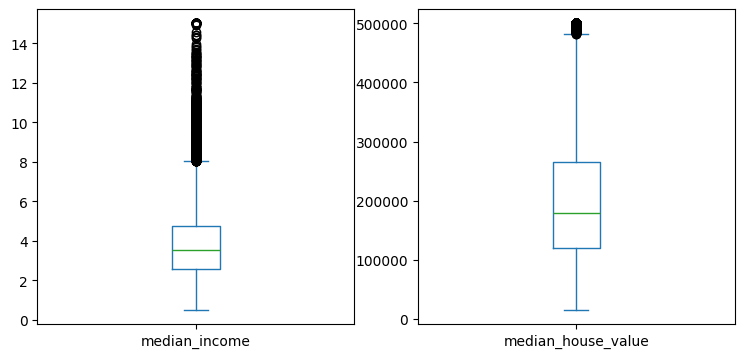

In [5]:
# bibilioteku za vizualizaciju podataka
import matplotlib.pyplot as plt

# ciljane kolone
kolone = ['median_income', 'median_house_value']
# crtanje
data[kolone].plot(figsize=(9,9), kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
# prikaz
plt.show()

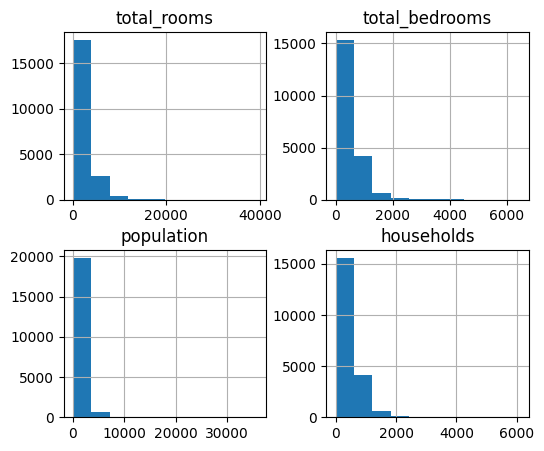

In [6]:
kolone = ['total_rooms','total_bedrooms','population','households']

# crtanje histograma
data[kolone].hist(figsize=(6,5))
plt.show()

- U prikazanom histogramu moze se odmah reci da je iskrivljenost podataka(**skewness**) na desno, da je vrijednost distribucije za odabrane kolone pozitivna.

Da bi smo vidjeli odnose izmedu atributa (linearne povezanosti izmedu dvije promjenjive) koristimo:

**Korelacija**
- racuna se pomocu ugradene funckije `corr()`
- uglavnom se racuna pomocu *Pearson's correlation coefficient* 

In [7]:
# ispustam kolonu
crl = data.drop(columns=['ocean_proximity']).corr(method='pearson')

set_option('display.precision', 3)
crl

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000,-0.925,-0.108,0.045,0.070,0.100,0.055,-0.015,-0.046
latitude,-0.925,1.000,0.011,-0.036,-0.067,-0.109,-0.071,-0.080,-0.144
housing_median_age,-0.108,0.011,1.000,-0.361,-0.320,-0.296,-0.303,-0.119,0.106
total_rooms,0.045,-0.036,-0.361,1.000,0.930,0.857,0.918,0.198,0.134
total_bedrooms,0.070,-0.067,-0.320,0.930,1.000,0.878,0.980,-0.008,0.050
population,0.100,-0.109,-0.296,0.857,0.878,1.000,0.907,0.005,-0.025
households,0.055,-0.071,-0.303,0.918,0.980,0.907,1.000,0.013,0.066
median_income,-0.015,-0.080,-0.119,0.198,-0.008,0.005,0.013,1.000,0.688
median_house_value,-0.046,-0.144,0.106,0.134,0.050,-0.025,0.066,0.688,1.000


- Izbacio sam posljednju kolonu zato sto prilikom pozivanja funkcije nije moglo konvertirati  **ocean_proximity** kolonu iz 'string' u 'float' format.

In [8]:
# funkcija za mjeru asimetrije distribucije (skewness)
crl.skew()

longitude             0.140
latitude              0.659
housing_median_age    2.231
total_rooms          -0.066
total_bedrooms        0.117
population            0.139
households            0.123
median_income         1.591
median_house_value    1.579
dtype: float64

- Vidimo da imamo cetiri kolone sa pozitivnom vrijednoscu distribucije.

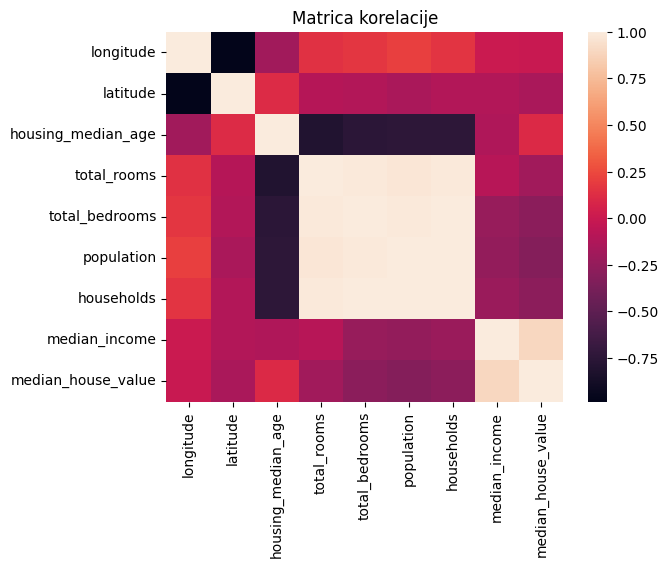

In [9]:
# biblioteka za vizualizaciju podataka
import seaborn as sns

# crtanje matrice korelacije
sns.heatmap(crl.corr())
plt.title('Matrica korelacije')
plt.show()

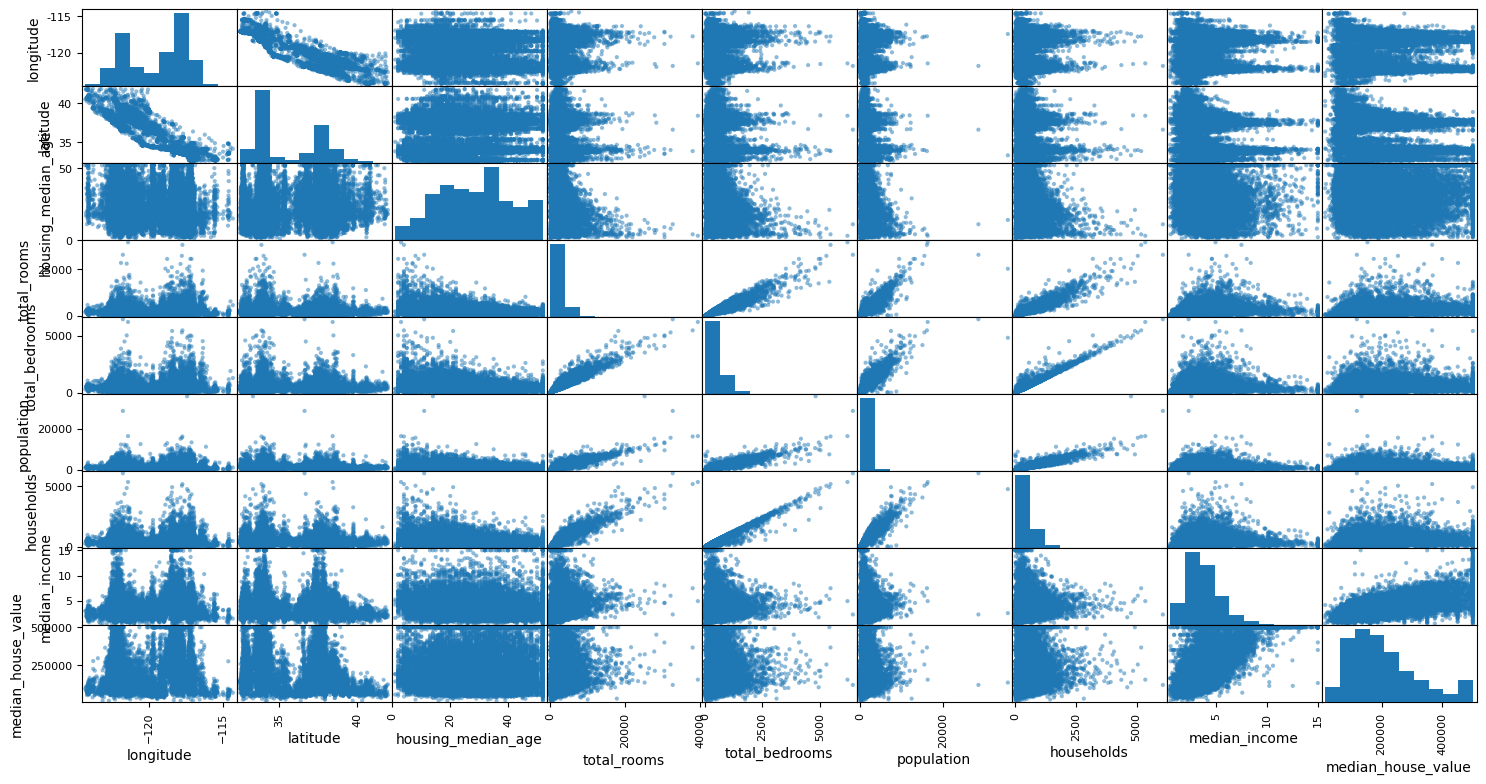

In [10]:
# modul za crtanje matrice rasipanja
from pandas.plotting import scatter_matrix

scatter = scatter_matrix(data, figsize=(18,9))
plt.show()

## Pitanja i odgovori:
1. **Koje su dimenzije skupa podataka?**
- U skupu ima 20640 redova i 10 kolona
2. **Ima li nedostajućih vrednosti u skupu podataka?**
- Ima u koloni total_bedrooms (207 NaN vrijednosti)
3. **Koja karakteristika najviše utiče na prosečnu cenu kuća?**
- U prikazanoj matrici korelacije moze se primijetiti da u ciljnoj koloni (median_house_value) utice median_income (median primanja stanovnika jednog distrikta) karakteristika
4. **Kakva je distribucija (skewness) podataka u kolonama total_rooms, total_bedrooms, population i households?**
- Iskrivljenost podataka u kolonama je pozitivna (iskrivljenost na desno), sto znaci da se visoke vrijednosti pojavljuju rijede u skupu podataka

## Podjela podataka

- dijelimo ih na ulazni skup **(X)** i izlazni skup **(y)**
- X je odabir znacajki (*features*) koji se kasnije koristi za izradu predvidanja
- y je cilj predvidanja (*prediciton target*)

Nakon dijeljenja na ulazni i izlazni skup sad ih dijelimo na:
- **set podataka za trening** koji ce se koristiti za obucavanje i fino podesavanje modela
- **set podataka za testiranje** koji se koristi za evaluaciju modela

Koristit cemo funkciju **train_test_split** iz biblioteke sklearn koju podesavamo sljdecim parametrima:
- **data** - skup podataka
- **test_size** - proporcija podataka koja ce zavrsiti unutar test skupa, u rasponu od 0 do 1 (0.3 znaci da ce test podaci biti 30% cjelokupnog skupa podataka)
- **random_state** - kontrolira nasumicnost dijeljenja podataka

U ovom slucaju koristit cemo i parametar **stratify** da klasa('ocean_proximity') bude ravnomjerno podjeljenja unutar oba skupa.

In [11]:
from sklearn.model_selection import train_test_split

# ulazni skup i izlazni skup
X = data.drop('median_house_value', axis=1)
y = data['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=X['ocean_proximity'])

In [12]:
print(X_train.shape)
print(X_test.shape)

(14448, 9)
(6192, 9)


# Transformacija podataka

- Za transformaciju podataka koristit cemo  klasu **ColumnTransformer** koji omogucava kreiranje skupa transformacija, kao i klasu **Pipeline** koja pomaze pri kreiranju sekvenci transformacija.

Klase koje smo koristili:
- `SimpleImputer()` - klasa koja se koristi za rukovanje NaN vrijednostima.U primjeru smo zamijenili NaN vrijednosti mjerom sredisnje tendencije (median)
- `StandardScaler()` - klasa koja se koristi za **standardizaciju**(uskladivanje) podataka.Transformira podatke tako da imaju srednju vrijednost 0 i standardnu devijaciju 1.
- `OrdinalEncoder()` - klasa koja se koristi za konvertiranje ordinalnih kategorickih podataka, postujuci utvrdeni redosljed.

Generirat cemo tri nove karakteristike pomocu **custom** transformatora `GenerateAttributes` koji smo napravili:
- broj soba po domaćinstvu (rooms_per_household);
- populacija po domaćinstvu (population_per_household);
- broj spavaćih soba u odnosu na broj soba (bedrooms_per_room).


In [13]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from GenerateAttributes import GenerateAttributes

categories = ['ocean_proximity']
num_features = ['longitude','latitude','housing_median_age','total_rooms',
                 'total_bedrooms','population','households','median_income']
features_to_generate = ['total_rooms','households','population','total_bedrooms']


numerical_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
    ])

categorical_transformer = Pipeline(
    steps=[
    ("ordinal", OrdinalEncoder())
    ])

ct1 = ColumnTransformer([
    ("num", numerical_transformer, num_features),
    ("cat", categorical_transformer, categories)
    ], remainder='passthrough'
    )

# kao izlaznu vrijednost zelimo DataFrame strukturu
ct1.set_output(transform='pandas')
# iskljucujemo generiranje prefiska na kolonama 
ct1.verbose_feature_names_out = False



predprocesor = Pipeline([
    ('ct1', ct1),
    ('generate', GenerateAttributes(columns=features_to_generate))
    ])


X_train = predprocesor.fit_transform(X_train, y_train)
X_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household,bedrooms_per_room
11844,-0.670,2.042,0.502,-1.036,-1.069,-1.069,-1.128,-0.647,1.0,0.918,0.947,1.032
10949,0.854,-0.884,-0.851,-0.891,-0.675,-0.535,-0.734,-0.637,0.0,1.214,0.729,0.758
17965,-1.204,0.782,-0.692,0.850,0.796,0.542,0.821,0.444,0.0,1.036,0.660,0.936
10628,0.904,-0.902,-1.965,-0.452,-0.516,-0.494,-0.524,0.895,0.0,0.862,0.942,1.141
1967,-0.525,1.450,-0.931,0.242,0.209,0.008,0.162,-0.607,1.0,1.495,0.048,0.866


- Generirali smo nove karakteristike i obavili cjelokupnu transformaciju podataka ukljucujuci i nove generirane kolone.